In [1]:
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

### XGBOOST

In [2]:
df_train = pd.read_csv('../data/train_con_features.csv', index_col='Unnamed: 0')
df_test = pd.read_csv('../data/test_con_features.csv', index_col='Unnamed: 0')
display(df_train.head())

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,hermoso_titulo,estado_titulo,cantidad_palabras_descripcion,relacion_palabras_descripcion,es_avenida,es_ciudad_capital,ciudad_turistica_top15,anio,mes,precio_prom_propiedad
0,254099,depto tipo a 402,depto interior de 80 15m2 consta de sala com...,Apartamento,avenida division del norte 2005,Benito Juárez,Distrito Federal,8.116114,2.0,1.0,...,0,0,0,0.000000,1,0,0,2015,8,2.763769e+06
1,53461,condominio horizontal en venta,p entre sonora y guerrero atr aacute s del h...,Casa en condominio,av mexico,La Magdalena Contreras,Distrito Federal,10.000000,3.0,2.0,...,0,0,1,0.007968,1,0,0,2013,6,2.898927e+06
2,247984,casa en venta urbi 3 recamaras tonala,descripcion la mejor ubicacion residencial en...,Casa,urbi tonala,Tonalá,Jalisco,5.000000,3.0,2.0,...,0,0,10,0.046957,0,0,0,2015,10,2.398158e+06
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,ignacio manuel altamirano 128,Zinacantepec,Edo. de México,1.000000,2.0,1.0,...,0,0,0,0.000000,0,0,0,2012,3,2.398158e+06
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,paseos del sol,Zapopan,Jalisco,10.000000,2.0,1.0,...,0,0,1,0.074108,0,0,0,2016,6,2.763769e+06


In [3]:
lst_propiedades = ['antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales', 
                   'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 
                   'cantidad_amenities', 'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion',
                   'metros_por_bano', 'metros_por_amenities', 'es_avenida', 'bano_por_habitacion', 
                   'garages_por_habitacion', 'precio_prom_propiedad']

lst_tipos_propiedades = ['es_Apartamento', 'es_Casa_en_condominio', 'es_Casa', 'es_Terreno',
                         'es_Terreno_comercial', 'es_Local_Comercial', 'es_Quinta_Vacacional',
                         'es_Oficina_comercial', 'es_Edificio', 'es_Casa_uso_de_suelo',
                         'es_Local_en_centro_comercial', 'es_Bodega_comercial', 'es_Otros',
                         'es_Villa', 'es_Duplex', 'es_Inmuebles_productivos_urbanos',
                         'es_Departamento_Compartido', 'es_Nave_industrial', 'es_Rancho',
                         'es_Terreno_industrial', 'es_Huerta', 'es_Lote', 'es_Hospedaje', 'es_Garage']

lst_cantidad_palabras = ['seguridad_descripcion', 'moderno_descripcion', 'hermoso_descripcion', 'estado_descripcion', 
                         'seguridad_titulo', 'moderno_titulo', 'hermoso_titulo', 'estado_titulo',
                         'relacion_palabras_descripcion', 'cantidad_palabras_descripcion']

lst_ciudades = ['provincia_top5', 'es_ciudad_capital', 'ciudad_turistica_top15', 'precio_prom_ciudad']

lst_fechas = ['anio', 'mes']

columnas_numericas = lst_propiedades + lst_tipos_propiedades + lst_cantidad_palabras + lst_fechas + lst_ciudades
columnas_numericas_y_precio = lst_propiedades + lst_tipos_propiedades + lst_cantidad_palabras + lst_fechas + lst_ciudades
columnas_numericas_y_precio.append('precio')

In [4]:
X = df_train[columnas_numericas_y_precio].drop(columns=['precio']).values
y = df_train['precio'].values

In [5]:
# Métrica de evaluación
#def RMSLE(actual, pred):
#    return (np.mean((np.log(actual + 1) - np.log(pred + 1)) ** 2)) **.5

#XGBoost_rmsle = RMSLE(y_test, XGBoost_pred)
#XGBoost_rmsle_train = RMSLE(y_train, XGBoost_fit.predict(X_train))
#print(f"RMSLE XGBoost (train): {XGBoost_rmsle_train:.5f}")
#print(f"RMSLE XGBoost: {XGBoost_rmsle:.5f}")
#print("------------------------------")

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(180000, 61) (180000,)
(60000, 61) (60000,)


In [7]:
import xgboost as xgb
XGBoost = xgb.XGBRegressor(objective='reg:squarederror')

In [8]:
#XGBoost_fit = XGBoost.fit(X_train, y_train)

In [9]:
best_n_estimators = 500 #best_hyp['n_estimators'] 
best_min_child_weight = 7 #best_hyp['min_child_weight']
best_max_depth = 5 #best_hyp['max_depth']
best_learning_rate = 0.08 #best_hyp['learning_rate']
best_gamma = 0.0 #best_hyp['gamma']
best_colsample_bytree = 0.8 #best_hyp['colsample_bytree']
best_alpha = 10 #best_hyp['alpha']

In [10]:
XGBoost = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=best_n_estimators, min_child_weight=best_min_child_weight, 
                           max_depth=best_max_depth, learning_rate=best_learning_rate, gamma=best_gamma, 
                           colsample_bytree=best_colsample_bytree, alpha=best_alpha, eval_metric='mae')

XGBoost_fit = XGBoost.fit(X_train, y_train)

In [11]:
XGBoost_pred = XGBoost_fit.predict(X_test)

In [12]:
from sklearn.metrics import mean_absolute_error

XGBoost_mae = mean_absolute_error(y_test, XGBoost_pred)
XGBoost_mae_train = mean_absolute_error(y_train, XGBoost_fit.predict(X_train))
print(f"MAE XGBoost (train): {XGBoost_mae_train:.5f}")
print(f"MAE XGBoost: {XGBoost_mae:.5f}")
print("------------------------------")

MAE XGBoost (train): 588853.10762
MAE XGBoost: 611293.42820
------------------------------


In [15]:
XGBoost_fit.feature_importances_

array([0.01052693, 0.00575076, 0.03598067, 0.10754042, 0.16664891,
       0.02634688, 0.01182033, 0.00335289, 0.00580507, 0.00256909,
       0.00540601, 0.01739024, 0.00290744, 0.01031951, 0.03087797,
       0.00517842, 0.00298848, 0.00378738, 0.03711568, 0.00866263,
       0.03356611, 0.06050507, 0.01118106, 0.02844682, 0.02988313,
       0.00675203, 0.00444986, 0.00194172, 0.00298585, 0.03741784,
       0.00171744, 0.00148001, 0.00375199, 0.00187336, 0.00125567,
       0.        , 0.0013897 , 0.00163434, 0.00255634, 0.00397359,
       0.00283759, 0.00201279, 0.        , 0.        , 0.        ,
       0.00280957, 0.01079356, 0.00695225, 0.00160908, 0.00090257,
       0.00113904, 0.00208919, 0.00214726, 0.00427835, 0.00311092,
       0.03670112, 0.00366647, 0.09039558, 0.0176175 , 0.00470188,
       0.06849764], dtype=float32)

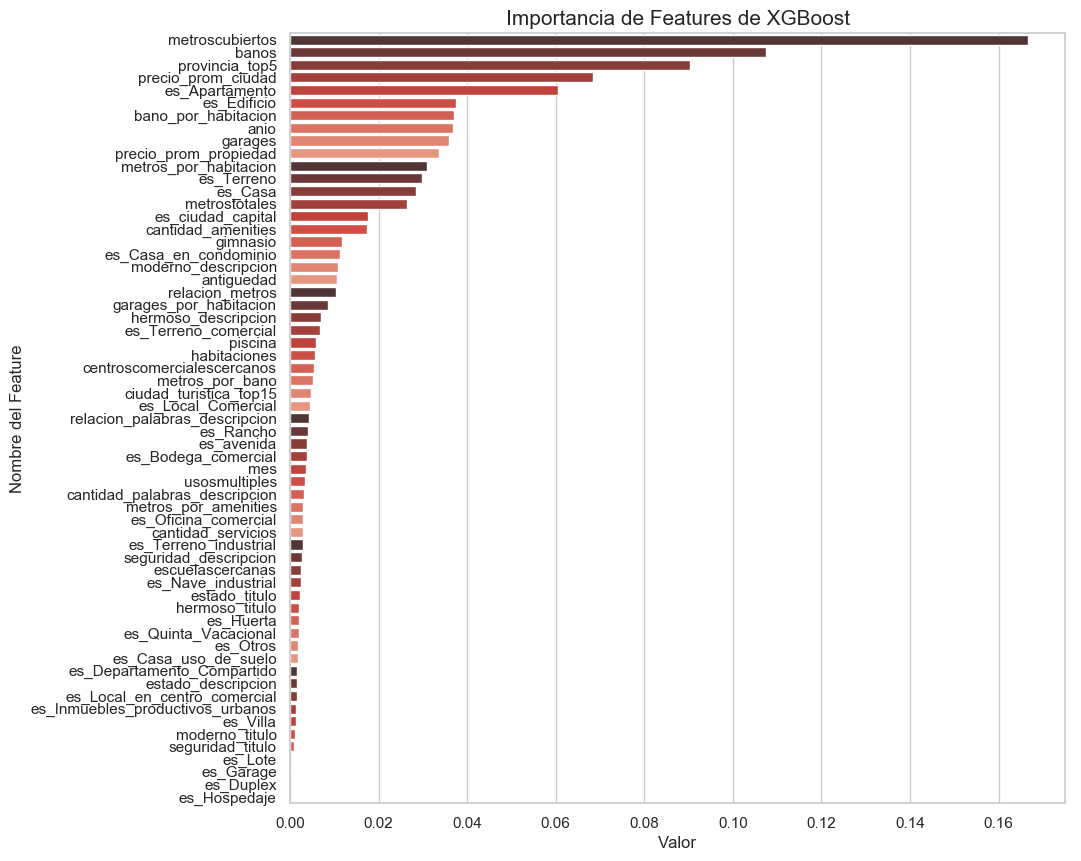

In [16]:
features = pd.DataFrame(index=columnas_numericas)
features['imp'] = XGBoost_fit.feature_importances_
features = features.sort_values(['imp'], ascending = False)
features

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 10)
sns.set(style="whitegrid")

g = sns.barplot(y=features.index, x=features.imp, \
                palette=sns.color_palette("Reds_d", 10));

g.set_title('Importancia de Features de XGBoost', fontsize=15);
g.set_xlabel('Valor');
g.set_ylabel('Nombre del Feature');

In [17]:
df_train_sumbit = df_train[columnas_numericas_y_precio]
df_test_submit = df_test[columnas_numericas]
XGBoost_pred_sumbit = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=best_n_estimators, min_child_weight=best_min_child_weight, 
                           max_depth=best_max_depth, learning_rate=best_learning_rate, gamma=best_gamma, 
                           colsample_bytree=best_colsample_bytree, alpha=best_alpha)\
                        .fit(df_train_sumbit[columnas_numericas], df_train_sumbit['precio'])\
                        .predict(df_test_submit[columnas_numericas])

C:\Users\maxi_\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\maxi_\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [18]:
resultado_submit = pd.DataFrame(index=df_test.index)
resultado_submit['id'] = df_test['id']
resultado_submit['target'] = XGBoost_pred_sumbit
display(resultado_submit.head())
resultado_submit.to_csv('../data/sumbitXGBoost.csv',index=False)

,id,target
0,4941,6.252377e+06
1,51775,9.592781e+05
2,115253,2.567808e+06
3,299321,1.446087e+06
4,173570,6.058113e+05


#### Score en Kaggle (features => score):
 **1.** *['antiguedad', 'habitaciones', 'garages', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'cantidad_amenities', 'cantidad_servicios'] =>* ***1310457.48052*** con objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3
 
 **2.** *['antiguedad', 'habitaciones', 'garages', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'cantidad_amenities', 'cantidad_servicios'] =>* ***1332492.86254*** con objective='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.05, max_depth = 5, alpha = 10, n_estimators = 100
 
 **3.** *['antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'cantidad_amenities', 'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion', 'metros_por_bano', 'metros_por_amenities', 'es_avenida', 'es_Apartamento', 'es_Casa_en_condominio', 'es_Casa', 'es_Terreno', 'es_Terreno_comercial', 'es_Local_Comercial', 'es_Quinta_Vacacional', 'es_Oficina_comercial', 'es_Edificio', 'es_Casa_uso_de_suelo', 'es_Local_en_centro_comercial', 'es_Bodega_comercial', 'es_Otros', 'es_Villa', 'es_Duplex', 'es_Inmuebles_productivos_urbanos', 'es_Departamento_Compartido', 'es_Nave_industrial', 'es_Rancho', 'es_Terreno_industrial', 'es_Huerta', 'es_Lote', 'es_Hospedaje', 'es_Garage', 'seguridad_descripcion', 'moderno_descripcion', 'hermoso_descripcion', 'estado_descripcion', 'seguridad_titulo', 'moderno_titulo', 'hermoso_titulo', 'estado_titulo', 'relacion_palabras_descripcion', 'cantidad_palabras_descripcion'] =>* ***881891.18436*** con objective='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.05, max_depth = 5, alpha = 10, n_estimators = 100

 **4.** *['antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'cantidad_amenities', 'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion',
'metros_por_bano', 'metros_por_amenities', 'es_avenida', 'es_Apartamento', 'es_Casa_en_condominio', 'es_Casa', 'es_Terreno', 'es_Terreno_comercial', 'es_Local_Comercial', 'es_Quinta_Vacacional', 'es_Oficina_comercial', 'es_Edificio', 'es_Casa_uso_de_suelo', 'es_Local_en_centro_comercial', 'es_Bodega_comercial', 'es_Otros', 'es_Villa', 'es_Duplex', 'es_Inmuebles_productivos_urbanos', 'es_Departamento_Compartido', 'es_Nave_industrial', 'es_Rancho', 'es_Terreno_industrial', 'es_Huerta', 'es_Lote', 'es_Hospedaje', 'es_Garage', 'seguridad_descripcion', 'moderno_descripcion', 'hermoso_descripcion', 'estado_descripcion', 'seguridad_titulo', 'moderno_titulo', 'hermoso_titulo', 'estado_titulo', 'relacion_palabras_descripcion', 'cantidad_palabras_descripcion', 'provincia_top5', 'es_ciudad_capital', 'ciudad_turistica_top15'] =>* ***846444.02590*** con objective='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.05, max_depth = 5, alpha = 10, n_estimators = 500

  **5.** *['antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'cantidad_amenities', 'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion',
'metros_por_bano', 'metros_por_amenities', 'es_avenida', 'es_Apartamento', 'es_Casa_en_condominio', 'es_Casa', 'es_Terreno', 'es_Terreno_comercial', 'es_Local_Comercial', 'es_Quinta_Vacacional', 'es_Oficina_comercial', 'es_Edificio', 'es_Casa_uso_de_suelo', 'es_Local_en_centro_comercial', 'es_Bodega_comercial', 'es_Otros', 'es_Villa', 'es_Duplex', 'es_Inmuebles_productivos_urbanos', 'es_Departamento_Compartido', 'es_Nave_industrial', 'es_Rancho', 'es_Terreno_industrial', 'es_Huerta', 'es_Lote', 'es_Hospedaje', 'es_Garage', 'seguridad_descripcion', 'moderno_descripcion', 'hermoso_descripcion', 'estado_descripcion', 'seguridad_titulo', 'moderno_titulo', 'hermoso_titulo', 'estado_titulo', 'relacion_palabras_descripcion', 'cantidad_palabras_descripcion', 'provincia_top5', 'es_ciudad_capital', 'ciudad_turistica_top15'] =>* ***813255.43502*** con objective='reg:squarederror', n_estimators=500, min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.0, colsample_bytree=0.4, alpha=10

  **6.** *['antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'cantidad_amenities', 'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion', 'metros_por_bano', 'metros_por_amenities', 'es_avenida', 'bano_por_habitacion', 'garages_por_habitacion', 'es_Apartamento', 'es_Casa_en_condominio', 'es_Casa', 'es_Terreno', 'es_Terreno_comercial', 'es_Local_Comercial', 'es_Quinta_Vacacional', 'es_Oficina_comercial', 'es_Edificio', 'es_Casa_uso_de_suelo', 'es_Local_en_centro_comercial', 'es_Bodega_comercial', 'es_Otros', 'es_Villa', 'es_Duplex', 'es_Inmuebles_productivos_urbanos', 'es_Departamento_Compartido', 'es_Nave_industrial', 'es_Rancho', 'es_Terreno_industrial', 'es_Huerta', 'es_Lote', 'es_Hospedaje', 'es_Garage', 'seguridad_descripcion', 'moderno_descripcion', 'hermoso_descripcion', 'estado_descripcion', 'seguridad_titulo', 'moderno_titulo', 'hermoso_titulo', 'estado_titulo', 'relacion_palabras_descripcion', 'cantidad_palabras_descripcion', 'provincia_top5', 'es_ciudad_capital', 'ciudad_turistica_top15', 'precio_prom_ciudad', 'anio', 'mes'] =>* ***613546.64523*** con objective='reg:squarederror', n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.08, gamma=0.0, colsample_bytree=0.8, alpha=10

In [2]:
'''hyp_params = {
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.1, 0.2 ],
    "alpha"            : [ 1, 3, 5, 7, 9, 10 ],
    "colsample_bytree" : [ 0.5 , 0.7, 0.8, 0.9 ], 
    "n_estimators"     : [500, 700, 1000] 
}
#colsample_bytree = 0.3, learning_rate = 0.05, max_depth = 5, alpha = 10, n_estimators = 500 gamma 0.0, 

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

skf = StratifiedKFold(10, shuffle=True, random_state=0)
random_search = RandomizedSearchCV(XGBoost, param_distributions=hyp_params, n_iter=10, cv=skf.split(X,y), scoring='neg_mean_squared_error')
random_search.fit(X, y)

best_hyp = random_search.best_params_
best_hyp'''


'hyp_params = {\n    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],\n    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],\n    "min_child_weight" : [ 1, 3, 5, 7 ],\n    "gamma"            : [ 0.1, 0.2 ],\n    "alpha"            : [ 1, 3, 5, 7, 9, 10 ],\n    "colsample_bytree" : [ 0.5 , 0.7, 0.8, 0.9 ], \n    "n_estimators"     : [500, 700, 1000] \n}\n#colsample_bytree = 0.3, learning_rate = 0.05, max_depth = 5, alpha = 10, n_estimators = 500 gamma 0.0, \n\nfrom sklearn.model_selection import RandomizedSearchCV, StratifiedKFold\n\nskf = StratifiedKFold(10, shuffle=True, random_state=0)\nrandom_search = RandomizedSearchCV(XGBoost, param_distributions=hyp_params, n_iter=10, cv=skf.split(X,y), scoring=\'neg_mean_squared_error\')\nrandom_search.fit(X, y)\n\nbest_hyp = random_search.best_params_\nbest_hyp'